In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

#macro_cols = ["metro_min_walk"]

#load files
train = pd.read_csv('../inputs/train.csv', parse_dates=['timestamp'])
test = pd.read_csv('../inputs/test.csv', parse_dates=['timestamp'])
#macro = pd.read_csv("../inputs/macro.csv", parse_dates=['timestamp'], usecols=['timestamp'] + macro_cols)
id_test = test.id

In [47]:
train['building_name']=train.sub_area + train['metro_km_avto'].astype(str)
test['building_name']=test.sub_area + test['metro_km_avto'].astype(str)

In [48]:
train['price_doc'].describe()

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

In [49]:
trainsub = train[train.price_doc > 1000000].copy()
trainsub[['price_doc', 'num_room', 'life_sq', 'full_sq']].sort_values('price_doc')

,price_doc,num_room,life_sq,full_sq
6805,1005000,NaN,44.0,60
661,1007000,NaN,16.0,35
10419,1015000,3.0,38.0,55
27236,1020000,2.0,29.0,49
6713,1020000,NaN,19.0,31
14800,1020000,1.0,17.0,35
227,1030000,NaN,17.0,39
841,1030000,NaN,50.0,86
23559,1030000,2.0,25.0,40
16454,1050000,3.0,34.0,52


In [50]:
trainsub['price_doc'].describe()

count    2.949100e+04
mean     7.327204e+06
std      4.723589e+06
min      1.005000e+06
25%      4.940760e+06
50%      6.350000e+06
75%      8.400000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

In [51]:
np.percentile(trainsub['price_doc'], 90)

11903597.0

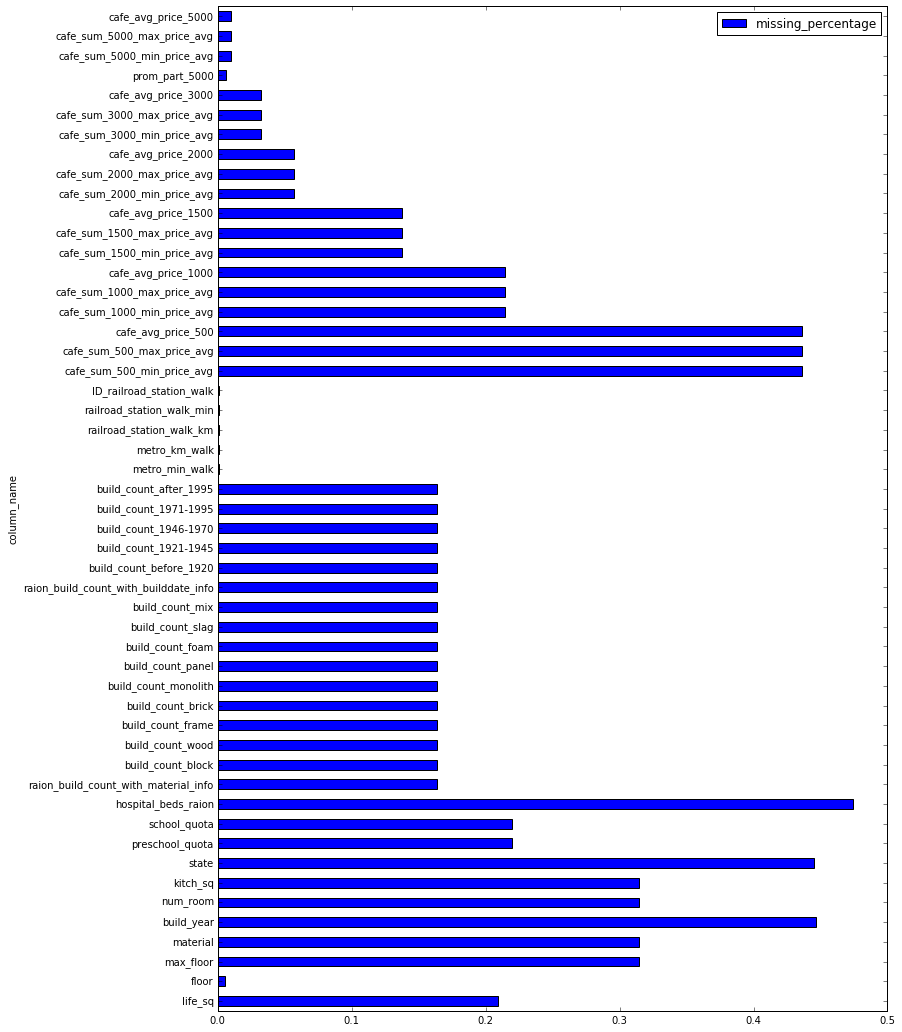

In [52]:
missing_df = (train.isnull().sum(axis=0) / train.shape[0]).reset_index()
missing_df.columns = ['column_name', 'missing_percentage']
missing_df = missing_df.ix[missing_df['missing_percentage']>0]
missing_df = missing_df.set_index('column_name')
missing_df.plot(kind='barh',figsize=(12,18))
plt.show()


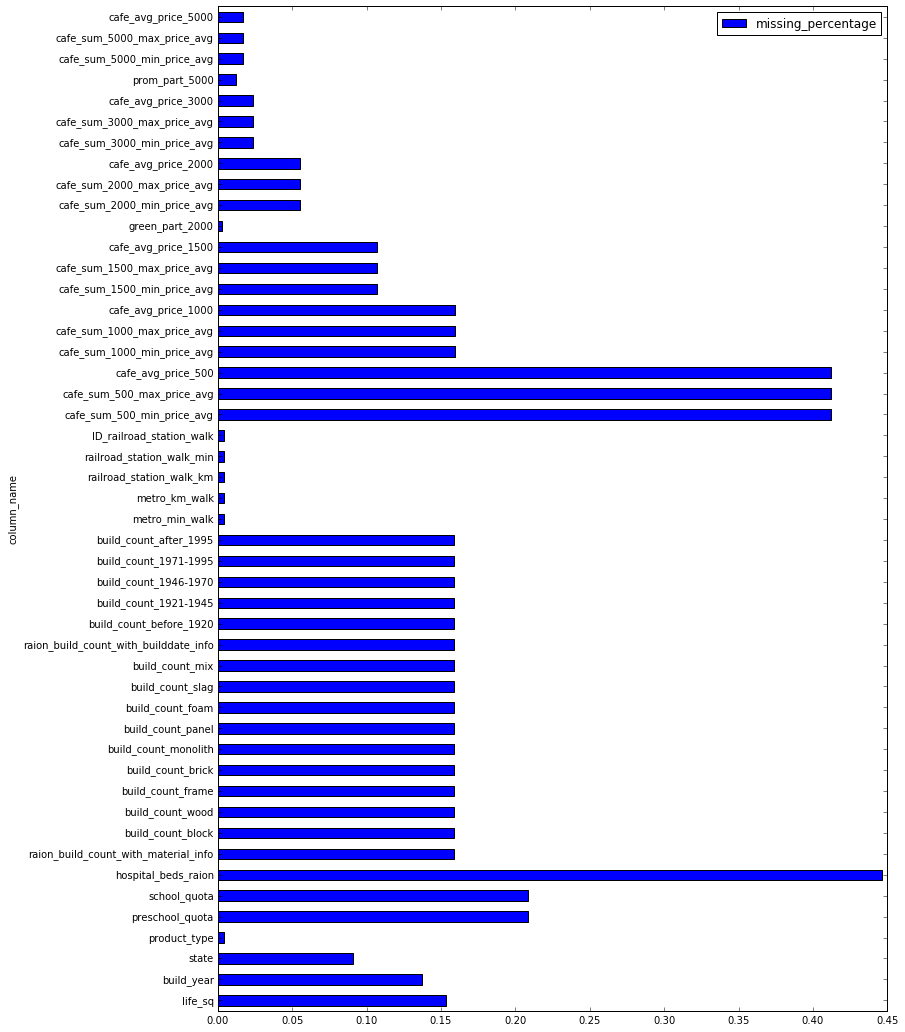

In [53]:
missing_df = (test.isnull().sum(axis=0) / test.shape[0]).reset_index()
missing_df.columns = ['column_name', 'missing_percentage']
missing_df = missing_df.ix[missing_df['missing_percentage']>0]
missing_df = missing_df.set_index('column_name')
missing_df.plot(kind='barh',figsize=(12,18))
plt.show()

## clean full_sq and life_sq
#### Training set

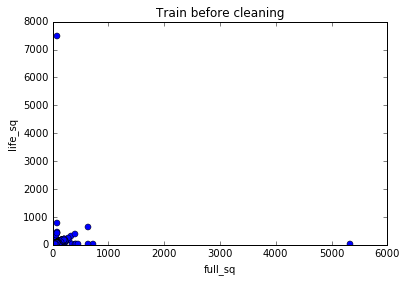

In [54]:
plt.plot(trainsub['full_sq'], trainsub['life_sq'], 'o')
plt.ylabel('life_sq')
plt.xlabel('full_sq')
plt.title('Train before cleaning')
plt.show()

In [55]:
main_stats = ['price_doc', 'num_room', 'life_sq', 'full_sq', 'floor', 'max_floor', 'kitch_sq', 'build_year', 'building_name']
trainsub.ix[[3527, 13546, 9646], main_stats]

,price_doc,num_room,life_sq,full_sq,floor,max_floor,kitch_sq,build_year,building_name
3527,6868818,NaN,22.0,5326,13.0,NaN,NaN,NaN,Birjulevo Vostochnoe3.11564781
13546,7705000,3.0,7478.0,79,8.0,17.0,1.0,2014.0,Poselenie Voskresenskoe2.254916339
9646,12031350,NaN,802.0,82,5.0,NaN,NaN,NaN,Chertanovo Juzhnoe0.751045779


In [56]:
# bullshit
trainsub.ix[3527, 'full_sq'] = np.nan
trainsub.ix[13546, 'life_sq'] = np.nan
# missclick
trainsub.ix[9646, 'life_sq'] = 82

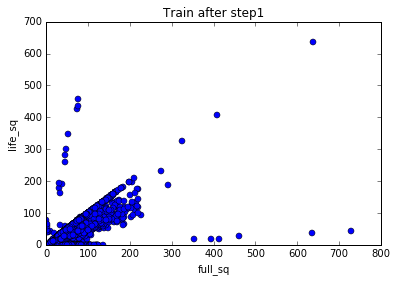

In [57]:
plt.plot(trainsub['full_sq'], trainsub['life_sq'], 'o')
plt.ylabel('life_sq')
plt.xlabel('full_sq')
plt.title('Train after step1')
plt.show()

Correct left tail first.

In [58]:
lefttail_idx = trainsub[(trainsub['life_sq'] > 140) & (trainsub['full_sq']<110)].index
trainsub.ix[lefttail_idx, main_stats]

,price_doc,num_room,life_sq,full_sq,floor,max_floor,kitch_sq,build_year,building_name
1084,6200000,NaN,281.0,44.0,6.0,NaN,NaN,NaN,Bibirevo1.131259906
1863,5900000,NaN,178.0,30.0,4.0,NaN,NaN,NaN,Presnenskoe1.432810901
4385,11918400,NaN,426.0,73.0,17.0,NaN,NaN,NaN,Vojkovskoe2.23034782
6336,5400000,NaN,191.0,37.0,5.0,NaN,NaN,NaN,Kosino-Uhtomskoe1.068294471
7208,6400000,NaN,195.0,31.0,5.0,NaN,NaN,NaN,Cheremushki0.808096488
9237,5600000,2.0,301.0,47.0,4.0,12.0,6.0,1973.0,Birjulevo Zapadnoe5.154622829
9256,13750000,3.0,458.0,77.0,12.0,16.0,10.0,1996.0,Jasenevo1.70640443
13629,4900000,2.0,259.0,45.0,5.0,5.0,5.0,1970.0,Poselenie Moskovskij6.732361525
13797,3550000,1.0,163.0,32.0,3.0,5.0,6.0,1963.0,Poselenie Shherbinka6.214917395
21080,7200000,3.0,349.0,52.0,1.0,9.0,6.0,1979.0,Solncevo1.541817769


In [59]:
trainsub.ix[lefttail_idx, 'life_sq'] = np.nan

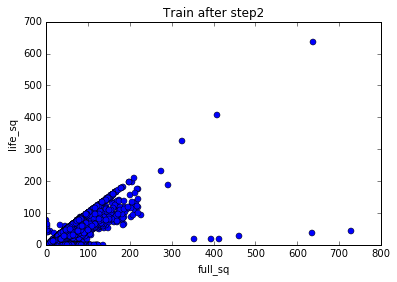

In [60]:
plt.plot(trainsub['full_sq'], trainsub['life_sq'], 'o')
plt.ylabel('life_sq')
plt.xlabel('full_sq')
plt.title('Train after step2')
plt.show()

In [61]:
rigttail_idx = trainsub[(trainsub['life_sq'] < 100) & (trainsub['full_sq']>250)].index
trainsub.ix[rigttail_idx, main_stats]

,price_doc,num_room,life_sq,full_sq,floor,max_floor,kitch_sq,build_year,building_name
1478,4750000,NaN,20.0,353.0,5.0,NaN,NaN,NaN,Solncevo1.021100811
1610,1050000,NaN,17.0,394.0,11.0,NaN,NaN,NaN,Ljublino1.686566142
2425,6117000,NaN,17.0,412.0,6.0,NaN,NaN,NaN,Filevskij Park1.088066871
2780,13250000,NaN,44.0,729.0,12.0,NaN,NaN,NaN,Troparevo-Nikulino1.965385471
5944,10200000,NaN,38.0,634.0,3.0,NaN,NaN,NaN,Lianozovo0.760070292
7207,5750000,NaN,27.0,461.0,2.0,NaN,NaN,NaN,Vyhino-Zhulebino2.06062485


In [62]:
trainsub.ix[rigttail_idx, 'full_sq'] = np.nan

In [63]:
middletail_idx = trainsub[(trainsub['life_sq'] > 100) & (trainsub['full_sq']>250)].index
trainsub.ix[middletail_idx, main_stats]

,price_doc,num_room,life_sq,full_sq,floor,max_floor,kitch_sq,build_year,building_name
128,5000000,NaN,325.0,325.0,7.0,NaN,NaN,NaN,Ivanovskoe1.070555937
1307,7750000,NaN,189.0,291.0,2.0,NaN,NaN,NaN,Kurkino7.255072854
18525,15919294,5.0,232.0,275.0,11.0,37.0,26.0,2009.0,Shhukino1.234877893
22785,4725142,2.0,637.0,637.0,18.0,19.0,10.0,2016.0,Tverskoe1.036567808
27793,3134129,1.0,407.0,407.0,4.0,4.0,10.0,2015.0,Filevskij Park1.057236265


In [64]:
trainsub.ix[[128, 22785, 27793], ['life_sq', 'full_sq']] = np.nan

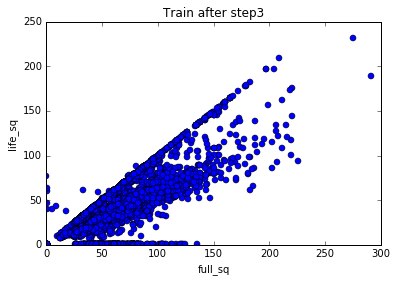

In [65]:
plt.plot(trainsub['full_sq'], trainsub['life_sq'], 'o')
plt.ylabel('life_sq')
plt.xlabel('full_sq')
plt.title('Train after step3')
plt.show()

In [66]:
small_life = trainsub[(trainsub['life_sq'] < 10) & (trainsub['full_sq']>0)].index
trainsub.ix[small_life, main_stats]

,price_doc,num_room,life_sq,full_sq,floor,max_floor,kitch_sq,build_year,building_name
104,4146000,NaN,1.0,26.0,6.0,NaN,NaN,NaN,Timirjazevskoe0.417108702
702,3150000,NaN,8.0,12.0,4.0,NaN,NaN,NaN,Horoshevo-Mnevniki3.246657429
1085,3000000,NaN,9.0,13.0,3.0,NaN,NaN,NaN,Horoshevo-Mnevniki3.246657429
1107,4600000,NaN,9.0,30.0,5.0,NaN,NaN,NaN,Caricyno1.999192628
2906,4070000,NaN,9.0,15.0,9.0,NaN,NaN,NaN,Zjuzino0.664063043
3426,1438647,NaN,0.0,71.0,3.0,NaN,NaN,NaN,Nekrasovka0.922890977
3800,5049071,NaN,0.0,57.0,10.0,NaN,NaN,NaN,Poselenie Moskovskij6.732361525
4138,4618597,NaN,0.0,61.0,4.0,NaN,NaN,NaN,Tverskoe1.036567808
4311,4741970,NaN,0.0,44.0,9.0,NaN,NaN,NaN,Poselenie Sosenskoe6.083999801
5879,5419778,NaN,0.0,61.0,6.0,NaN,NaN,NaN,Nekrasovka0.369300592


In [67]:
trainsub.ix[small_life, 'life_sq'] = np.nan

In [68]:
small_full = trainsub[(trainsub['full_sq'] < 10) & (trainsub['life_sq']>0)].index
trainsub.ix[small_full, main_stats]

,price_doc,num_room,life_sq,full_sq,floor,max_floor,kitch_sq,build_year,building_name
1188,6300000,NaN,44.0,9.0,3.0,NaN,NaN,NaN,Veshnjaki1.318052306
2009,5770000,NaN,40.0,5.0,5.0,NaN,NaN,NaN,Gol'janovo1.33668147
11332,3357774,1.0,40.0,1.0,10.0,17.0,1.0,2013.0,Poselenie Shherbinka5.057597846
22412,14923206,1.0,47.0,1.0,11.0,17.0,1.0,2014.0,Presnenskoe1.455347933
24296,8167508,3.0,77.0,0.0,4.0,17.0,0.0,0.0,Poselenie Vnukovskoe2.077115314
26264,5983900,2.0,60.0,1.0,17.0,17.0,1.0,2014.0,Nekrasovka2.111455943
26363,14430018,2.0,64.0,1.0,22.0,22.0,1.0,NaN,Chertanovo Juzhnoe0.751045779


In [69]:
trainsub.ix[small_full, 'full_sq'] = np.nan

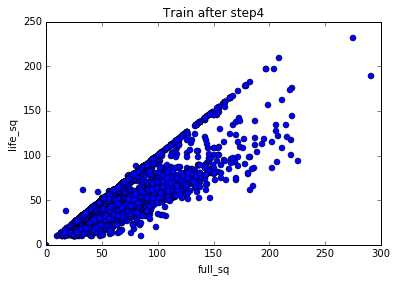

In [70]:
plt.plot(trainsub['full_sq'], trainsub['life_sq'], 'o')
plt.ylabel('life_sq')
plt.xlabel('full_sq')
plt.title('Train after step4')
plt.show()

In [71]:
small_all = trainsub[(trainsub['full_sq'] < 10)].index
trainsub.ix[small_all, main_stats]

,price_doc,num_room,life_sq,full_sq,floor,max_floor,kitch_sq,build_year,building_name
6112,5177040,NaN,NaN,6.0,3.0,NaN,NaN,NaN,Poselenie Voskresenskoe2.436882294
16289,4457400,1.0,NaN,1.0,1.0,1.0,1.0,1.0,Poselenie Voskresenskoe2.436882294
16738,7820575,1.0,NaN,1.0,1.0,1.0,1.0,1.0,Poselenie Voskresenskoe2.531421821
17194,13066000,1.0,NaN,1.0,1.0,1.0,1.0,1.0,Pokrovskoe Streshnevo2.503193979
17932,4425000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Poselenie Voskresenskoe2.254916339
18600,6675730,1.0,NaN,1.0,1.0,1.0,1.0,1.0,Tverskoe1.036567808
22171,6256186,1.0,NaN,1.0,1.0,1.0,1.0,1.0,Poselenie Vnukovskoe2.077115314
22722,4740000,1.0,NaN,1.0,1.0,25.0,1.0,2014.0,Nekrasovka0.801174699
22795,5591788,3.0,NaN,1.0,7.0,19.0,1.0,2015.0,Poselenie Shherbinka7.452168749
22871,4740000,1.0,NaN,1.0,1.0,1.0,1.0,2015.0,Nekrasovka0.801174699


In [72]:
trainsub.ix[small_all, ['full_sq', 'life_sq']] = np.nan

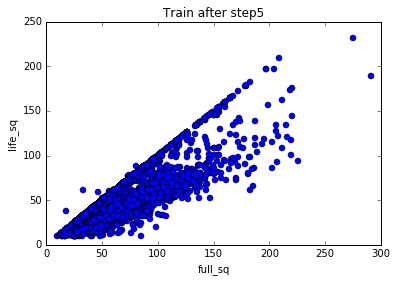

In [73]:
plt.plot(trainsub['full_sq'], trainsub['life_sq'], 'o')
plt.ylabel('life_sq')
plt.xlabel('full_sq')
plt.title('Train after step5')
plt.show()

In [74]:
# nans of one feature are not showen in graph
too_big = trainsub[(trainsub['full_sq'] > 330)].index
trainsub.ix[too_big, main_stats]

,price_doc,num_room,life_sq,full_sq,floor,max_floor,kitch_sq,build_year,building_name
3596,3899400,NaN,NaN,388.0,9.0,NaN,NaN,NaN,Nekrasovka0.369300592
18341,6213200,2.0,NaN,634.0,3.0,17.0,0.0,NaN,Nekrasovka3.776835959
23715,6572700,2.0,NaN,603.0,16.0,18.0,1.0,NaN,Krjukovo19.57135761


In [75]:
trainsub.ix[too_big, 'full_sq'] = np.nan

#### Testing set

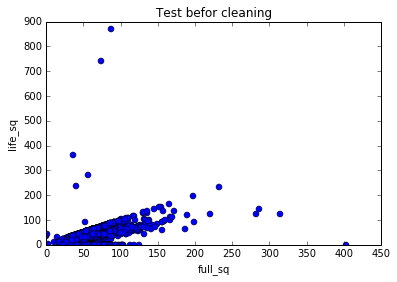

In [76]:
plt.plot(test['full_sq'], test['life_sq'], 'o')
plt.ylabel('life_sq')
plt.xlabel('full_sq')
plt.title('Test befor cleaning')
plt.show()

In [77]:
test_main_stats = [i for i in main_stats if i not in ['price_doc']]

In [78]:
test[test['life_sq'] > test['full_sq']][[ 'num_room', 'life_sq', 'full_sq']]

,num_room,life_sq,full_sq
64,1,30.60,29.80
119,3,104.28,100.04
171,2,60.00,57.80
464,1,37.80,0.00
601,2,742.00,74.20
1896,1,361.00,36.10
2027,3,93.20,51.90
2031,2,237.00,40.20
2791,3,869.00,86.90
2804,1,33.80,14.80


In [79]:
# full --> nan
for i in [464, 5383]:
    test.ix[i, 'full_sq'] = np.nan
    
# life --> full
for i in [601, 1896, 2791]:
    test.ix[i, 'life_sq'] = test.ix[i, 'full_sq']

# life --> nan   
for i in [2031, 5187]:
    test.ix[i, 'life_sq'] = np.nan

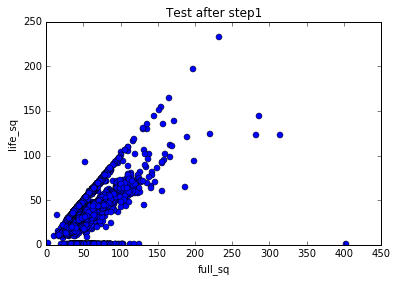

In [80]:
plt.plot(test['full_sq'], test['life_sq'], 'o')
plt.ylabel('life_sq')
plt.xlabel('full_sq')
plt.title('Test after step1')
plt.show()

In [81]:
small_life = test[(test['life_sq'] < 10)].index
test.ix[small_life, main_stats]

,price_doc,num_room,life_sq,full_sq,floor,max_floor,kitch_sq,build_year,building_name
44,NaN,1,1.0,35.82,14,1,1.0,2015.0,Filevskij Park0.97353035
75,NaN,1,1.0,43.30,19,22,1.0,2015.0,Poselenie Vnukovskoe3.332130611
89,NaN,2,1.0,40.00,9,1,1.0,NaN,Tverskoe1.036567808
188,NaN,1,1.0,56.80,10,25,1.0,2015.0,Mitino0.031808467
194,NaN,2,1.0,61.70,6,1,1.0,2017.0,Sviblovo1.222697207
254,NaN,2,1.0,74.61,3,1,1.0,2015.0,Sviblovo1.189131401
266,NaN,2,1.0,61.50,6,22,1.0,2015.0,Poselenie Vnukovskoe2.199784626
270,NaN,2,1.0,65.65,7,25,1.0,2015.0,Mitino0.031808467
303,NaN,2,1.0,69.30,12,1,1.0,2015.0,Poselenie Sosenskoe5.713989253
319,NaN,1,1.0,67.67,21,1,1.0,2016.0,Filevskij Park1.759213582


In [82]:
test.ix[small_life, 'life_sq'] = np.nan
test.ix[6350, 'full_sq'] = np.nan
test.ix[4634, 'full_sq'] = np.nan

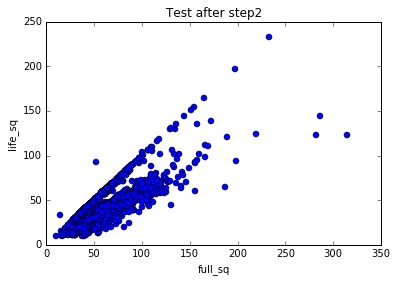

In [83]:
plt.plot(test['full_sq'], test['life_sq'], 'o')
plt.ylabel('life_sq')
plt.xlabel('full_sq')
plt.title('Test after step2')
plt.show()

In [84]:
quess = test[(test['full_sq'] > 180)].index
test.ix[quess, test_main_stats]

,num_room,life_sq,full_sq,floor,max_floor,kitch_sq,build_year,building_name
1671,3,NaN,184.5,30,30,1.0,NaN,Rostokino0.982013251
1722,7,123.8,219.6,3,3,10.1,2005.0,Severnoe6.228754384
2265,3,120.7,189.1,2,2,24.1,2013.0,Tverskoe0.901865928
2365,4,197.0,197.0,2,2,20.2,2014.0,Kuncevo1.908403598
2467,5,122.6,282.0,1,3,34.8,2010.0,Troickij okrug19.08786343
4196,5,122.6,314.5,3,3,34.8,2010.0,Troickij okrug19.08786343
4463,4,65.1,186.9,1,3,13.8,2014.0,Poselenie Rjazanovskoe8.141694253
4990,4,93.8,198.4,21,23,14.3,2014.0,Jasenevo0.343183185
5975,1,232.7,232.7,3,3,1.0,NaN,Tverskoe1.036567808
7212,7,144.4,285.8,28,40,17.9,2012.0,Sokol1.670455296


#### Floors

In [86]:
bad_maxfloor = test[(test['max_floor'] < test['floor'])].index
test.ix[bad_maxfloor, 'max_floor'] = np.nan

In [89]:
bad_maxfloor = trainsub[(trainsub['max_floor'] < trainsub['floor'])].index
trainsub.ix[bad_maxfloor, 'max_floor'] = np.nan

#### kitchen
It has very often the same value as full_sq and sometimes build_year value.

In [120]:
trainsub[trainsub['kitch_sq'] > 100][main_stats]

,price_doc,num_room,life_sq,full_sq,floor,max_floor,kitch_sq,build_year,building_name
8949,8287230,3.0,123.0,123.0,3.0,10.0,123.0,2013.0,Poselenie Voskresenskoe5.302954663
10368,7281225,3.0,41.0,79.0,5.0,17.0,2013.0,2013.0,Poselenie Voskresenskoe2.436882294
11520,6300000,2.0,23.0,38.0,11.0,14.0,620.0,1971.0,Novogireevo1.40483126
13117,3650000,1.0,19.0,31.0,5.0,NaN,1970.0,NaN,Izmajlovo1.483760862
20053,8200031,3.0,112.0,112.0,3.0,3.0,112.0,2015.0,Poselenie Sosenskoe5.137825447
21415,3801200,1.0,43.0,43.0,3.0,NaN,2014.0,2014.0,Poselenie Sosenskoe6.13856957
27931,10950065,3.0,112.0,112.0,3.0,3.0,112.0,2015.0,Poselenie Sosenskoe5.137825447
27996,10500000,3.0,112.0,112.0,3.0,3.0,112.0,2015.0,Zapadnoe Degunino2.159295482


In [130]:
# kitch_sq as build_year and build_year is missing
trainsub.ix[13117, 'build_year'] = 1970
# put nan to kitch_sq if it is bigger then full_sq
bad_k1 = test[test['kitch_sq'] >= test['full_sq']].index
bad_k2 = trainsub[trainsub['kitch_sq'] >= trainsub['full_sq']].index
test.ix[bad_k1, 'kitch_sq'] = np.nan
trainsub.ix[bad_k2, 'kitch_sq'] = np.nan

It is more difficult if kitch_sq is between life_sq and full_sq. There could be problem in life_sq sometimes.

In [136]:
trainsub[trainsub['kitch_sq'] == trainsub['life_sq']][main_stats]

,price_doc,num_room,life_sq,full_sq,floor,max_floor,kitch_sq,build_year,building_name
10440,1100000,1.0,21.0,41.0,11.0,14.0,21.0,2002.0,Savelki23.74779819
15930,6235000,2.0,60.0,63.0,14.0,20.0,60.0,2015.0,Poselenie Voskresenskoe2.436882294
22549,7500000,1.0,40.0,44.0,4.0,32.0,40.0,2006.0,Vostochnoe Degunino1.879548879
22863,6270000,1.0,14.0,35.0,5.0,10.0,14.0,2002.0,Mar'ino2.242473478
23256,11400000,3.0,10.0,85.0,9.0,17.0,10.0,1996.0,Mitino1.780133797
23336,4500000,1.0,10.0,26.0,6.0,9.0,10.0,1970.0,Ochakovo-Matveevskoe6.650800161
26899,6500000,1.0,19.0,38.0,6.0,16.0,19.0,1980.0,Mar'ino2.585216768
29668,5515295,1.0,15.0,45.0,3.0,3.0,15.0,2013.0,Poselenie Desjonovskoe14.03738465


In [137]:
test[test['kitch_sq'] == test['life_sq']][test_main_stats]

,num_room,life_sq,full_sq,floor,max_floor,kitch_sq,build_year,building_name
11,1,10.0,39.2,11,17.0,10.0,0.0,Poselenie Vnukovskoe1.722233308
60,2,20.0,63.4,9,17.0,20.0,0.0,Poselenie Vnukovskoe1.722233308
238,1,11.3,41.9,11,15.0,11.3,2017.0,Poselenie Sosenskoe5.438936523
1429,4,23.3,30.7,8,17.0,23.3,2017.0,Chertanovo Severnoe1.504563267
4621,1,19.1,34.8,5,5.0,19.1,1960.0,Sokol'niki1.600430439
5583,1,18.5,44.8,6,11.0,18.5,2017.0,Poselenie Vnukovskoe2.295028376
5952,1,10.0,37.0,4,17.0,10.0,0.0,Solncevo1.089409604
6883,2,29.3,59.6,14,17.0,29.3,2013.0,Poselenie Voskresenskoe2.060327523


In [111]:
name = 'Sviblovo0.652243736'
print(test[test['building_name']==name][test_main_stats])
trainsub[trainsub['building_name']==name][main_stats]

      num_room  life_sq  full_sq  floor  max_floor  kitch_sq  build_year  \
46           1      NaN    40.21     10       16.0      1.00      2015.0   
73           2      NaN    61.70      7        NaN      1.00      2015.0   
139          2    51.91    51.91     15       17.0     51.91      2016.0   
279          2    64.67    64.67      3       17.0      1.00      2015.0   
357          1      NaN    33.20      7        NaN      0.00         NaN   
473          1      NaN    40.21      2        NaN      0.00         NaN   
503          1      NaN    41.39      3        NaN      1.00      2017.0   
546          1      NaN    43.92      2       12.0      1.00      2015.0   
557          2      NaN    61.70      2        NaN      1.00      2015.0   
946          2    61.70    61.70      5        5.0      1.00      2017.0   
1164         1      NaN    43.92     10        NaN      1.00      2015.0   
1243         2    64.67    64.67     10        NaN      1.00         1.0   
1318        

,price_doc,num_room,life_sq,full_sq,floor,max_floor,kitch_sq,build_year,building_name
28634,8103632,1.0,NaN,45.0,18.0,NaN,1.0,2015.0,Sviblovo0.652243736
29203,7765056,1.0,NaN,43.0,3.0,NaN,0.0,NaN,Sviblovo0.652243736
29323,11713975,2.0,NaN,65.0,14.0,17.0,1.0,NaN,Sviblovo0.652243736
29346,9515520,2.0,NaN,57.0,9.0,16.0,1.0,2015.0,Sviblovo0.652243736
29498,9406308,2.0,NaN,55.0,7.0,17.0,1.0,NaN,Sviblovo0.652243736
29535,9723000,2.0,NaN,55.0,13.0,NaN,1.0,2015.0,Sviblovo0.652243736
29567,11921000,2.0,NaN,65.0,10.0,NaN,1.0,2015.0,Sviblovo0.652243736
29643,15699800,2.0,NaN,68.0,22.0,NaN,1.0,2015.0,Sviblovo0.652243736
29664,10466508,2.0,65.0,65.0,2.0,2.0,1.0,2017.0,Sviblovo0.652243736
29671,7376804,1.0,43.0,43.0,3.0,17.0,8.0,2016.0,Sviblovo0.652243736
